In [31]:
# Tensorflow / Keras
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras.models import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Masking,Bidirectional, LSTM, RepeatVector, Dense, TimeDistributed # for creating layers inside the Neural Network
from keras.optimizers import Adam
# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version

# Sklearn
import sklearn
print('sklearn: %s' % sklearn.__version__) # print version
from sklearn.preprocessing import MinMaxScaler # for feature scaling

# Visualization
import plotly 
import plotly.express as px
import plotly.graph_objects as go
print('plotly: %s' % plotly.__version__) # print version

#file accessing
import os
# time stuff
from datetime import timedelta
import calendar
from matplotlib import pyplot as plt

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
from tqdm import tqdm_notebook
from pmdarima.arima import auto_arima

from itertools import product
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


Tensorflow/Keras: 2.9.0
pandas: 1.4.2
numpy: 1.22.4
sklearn: 1.1.1
plotly: 5.9.0


In [2]:
df=pd.read_csv('InSAR_data_south/displacement/export_dataframe1.csv')
df=df.set_index([df.columns[0],df.columns[1]])
df.columns=pd.to_datetime(df.columns, format='%Y%m%d')
df

2014-11-08  2014-12-02  2014-12-26  2015-02-12  \
Longitude Latitude                                                   
-120.9486 34.1347          NaN         NaN         NaN         NaN   
          34.1367          NaN         NaN         NaN         NaN   
          34.1387          NaN         NaN         NaN         NaN   
          34.1407          NaN         NaN         NaN         NaN   
          34.1427          NaN         NaN         NaN         NaN   
...                        ...         ...         ...         ...   
-117.6414 37.6236          0.0      4.8278     -1.3065         NaN   
          37.6256          0.0      4.8698     -1.2137         NaN   
          37.6276          0.0      4.8693     -1.1893         NaN   
          37.6296          0.0      4.8277     -1.1906         NaN   
          37.6316          0.0      4.8729     -1.1200         NaN   

                    2015-03-08  2015-04-01  2015-04-25  2015-05-19  \
Longitude Latitude                                                   
-120.9486 34.1347          NaN         NaN         NaN         NaN   
          34.1367          NaN         NaN         NaN         NaN   
          34.1387          NaN         NaN         NaN         NaN   
          34.1407          NaN         NaN         NaN         NaN   
          34.1427          NaN         NaN         NaN         NaN   
...                        ...         ...         ...         ...   
-117.6414 37.6236      -4.1515     -1.9999      9.9914     -3.1055   
          37.6256      -4.1588     -1.7372     10.4130     -2.9584   
          37.6276      -4.1632     -1.7107     10.4830     -2.9318   
          37.6296      -4.1240     -1.8949     10.1870     -3.0179   
          37.6316      -4.1457     -1.7033     10.5180     -2.9269   

                    2015-06-12  2015-07-06  ...  2018-10-18  2018-10-30  \
Longitude Latitude                          ...                           
-120.9486 34.1347          NaN         NaN  ...         NaN         NaN   
          34.1367          NaN         NaN  ...         NaN         NaN   
          34.1387          NaN         NaN  ...         NaN         NaN   
          34.1407          NaN         NaN  ...         NaN         NaN   
          34.1427          NaN         NaN  ...         NaN         NaN   
...                        ...         ...  ...         ...         ...   
-117.6414 37.6236     -0.32799      6.9899  ...      8.5800      11.341   
          37.6256     -0.33838      7.3402  ...      9.2515      11.996   
          37.6276     -0.34454      7.3978  ...      8.8321      11.570   
          37.6296     -0.31614      7.1245  ...     10.3320      13.073   
          37.6316     -0.33153      7.3839  ...      9.3376      12.053   

                    2018-11-11  2018-11-17  2018-11-23  2018-12-05  \
Longitude Latitude                                                   
-120.9486 34.1347          NaN         NaN         NaN         NaN   
          34.1367          NaN         NaN         NaN         NaN   
          34.1387          NaN         NaN         NaN         NaN   
          34.1407          NaN         NaN         NaN         NaN   
          34.1427          NaN         NaN         NaN         NaN   
...                        ...         ...         ...         ...   
-117.6414 37.6236       5.5704      7.6113      17.002      9.6014   
          37.6256       6.0621      8.2387      17.526      9.5942   
          37.6276       5.5897      7.8226      17.066      9.2927   
          37.6296       7.2137      9.3699      18.582     10.8610   
          37.6316       6.0863      8.3323      17.499      9.8190   

                    2018-12-17  2018-12-29  2019-01-10  2019-01-22  
Longitude Latitude                                                  
-120.9486 34.1347          NaN         NaN         NaN         NaN  
          34.1367          NaN         NaN         NaN         NaN  
          34.1387          NaN     

In [3]:
tup=(-119.9588,35.185)
data=df[df.index==tup].copy()
data

,,2014-11-08,2014-12-02,2014-12-26,2015-02-12,2015-03-08,2015-04-01,2015-04-25,2015-05-19,2015-06-12,2015-07-06,...,2018-10-18,2018-10-30,2018-11-11,2018-11-17,2018-11-23,2018-12-05,2018-12-17,2018-12-29,2019-01-10,2019-01-22
Longitude,Latitude,,,,,,,,,,,,,,,,,,,,,
-119.9588,35.185,0.0,-11.225,-2.9883,-2.1471,-4.9348,-4.855,-5.1682,-3.3311,-2.0852,-1.5282,...,-6.1054,-3.8771,-5.0105,-6.429,-4.0435,-7.6104,-2.7098,-2.0944,-2.5916,-3.4094


In [4]:
data=data.drop(columns=data.columns[0:3],axis=1)

data=data.drop(columns=data.columns[105:108],axis=1)

In [5]:
data=data.transpose()

data = data.set_axis(['data'], axis=1, inplace=False)
#data.insert(0,"date",value=data.index)
data=data.reset_index()
data.rename(columns={'index':'date'}, inplace=True)

In [6]:

data.data.values[np.isnan(data.data.values)] = -2.5
data.data.values
#test=data.data.values.to_numpy().flatten() 
#test

array([ -2.1471  ,  -4.9348  ,  -4.855   ,  -5.1682  ,  -3.3311  ,
        -2.0852  ,  -1.5282  ,  -9.7155  ,  -3.3747  , -10.139   ,
        -6.2046  ,  -1.0547  ,  -5.1957  ,  -3.7911  ,  -4.1615  ,
        -4.9889  ,  -2.737   ,  -1.7155  ,  -7.8196  ,  -4.7153  ,
        -4.7225  ,  -3.5555  ,  -4.1162  ,  -5.503   ,  -4.7902  ,
         0.028548,  -3.004   ,  -4.6391  ,  -3.4299  ,  -5.2231  ,
        -2.195   ,  -3.6062  ,  -5.2456  ,  -2.426   ,   0.5123  ,
        -4.2348  ,  -4.0695  ,  -3.1103  ,  -3.2679  ,  -3.5452  ,
        -3.8959  ,  -1.3526  ,  -4.741   ,  -2.9943  ,  -1.3547  ,
        -3.1549  ,  -2.3919  ,  -3.912   ,  -2.4157  ,  -2.6661  ,
        -5.6262  ,  -4.4636  ,  -2.0878  ,  -2.3241  ,  -2.6001  ,
        -1.5551  ,  -2.975   ,   3.4396  ,  -3.8537  ,  -7.5378  ,
         0.3005  ,  -4.0588  ,  -0.35946 ,   1.6053  ,  -4.233   ,
        -4.6993  ,  -5.9306  ,  -4.2687  ,  -6.7993  ,  -4.2249  ,
        -3.0255  ,  -6.8424  ,  -4.1839  ,  -7.2538  ,  -4.786

In [7]:
result = adfuller(data.data.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

#It calculates the p-value and 
# compares it with a threshold value or significance level of 0.05. 
# If the p-value is less than this level, then the data is stationary; else, the differencing order is incremented by one.
##p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

ADF Statistic: -3.2088077979327707
n_lags: 0.01948047663341061
p-value: 0.01948047663341061
Critial Values:
   1%, -3.497501033
Critial Values:
   5%, -2.89090644
Critial Values:
   10%, -2.5824349


**p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.**
Data is stationary so can proceed with ARIMA or ARMA.

In [8]:
data3=data.resample("M", on="date").agg('mean').dropna().reset_index(drop=False)
data3

,date,data
0,2015-02-28,-2.147100
1,2015-03-31,-4.934800
2,2015-04-30,-5.011600
3,2015-05-31,-3.331100
4,2015-06-30,-2.085200
5,2015-07-31,-5.621850
6,2015-08-31,-3.374700
7,2015-09-30,-10.139000
8,2015-10-31,-6.204600
9,2015-11-30,-3.125200


Run ETS Decomposition on data (To check the seasonality in data)

In [9]:
result=seasonal_decompose(data3.data, model='additive', period=12)

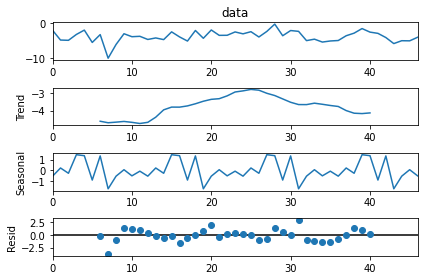

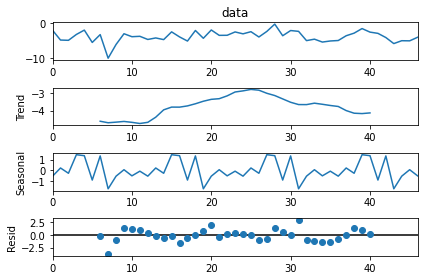

In [10]:
result.plot()

In [11]:

df_train=data3.iloc[:32, :].copy()
df_test=data3.iloc[32:,].copy()
print("df_train: ",df_train)
print("df_test: ",df_test)

df_test:           date      data
36 2018-02-28 -5.068650
37 2018-03-31 -3.701400
38 2018-04-30 -2.956750
39 2018-05-31 -1.644237
40 2018-06-30 -2.660750
41 2018-07-31 -3.014767
42 2018-08-31 -4.217467
43 2018-09-30 -5.949450
44 2018-10-31 -5.126467
45 2018-11-30 -5.161000
46 2018-12-31 -4.138200


In [14]:
model = auto_arima(data3.data.values, start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,             
                      d=1,          
                      seasonal=False,   
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=157.594, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=150.121, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=144.309, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=155.651, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=142.309, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=144.164, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=144.217, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=148.212, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=146.146, Time=0.07 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.859 seconds


In [17]:
model=ARIMA(df_train.data.values, order=(0,1,1))
model_fit=model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   36
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -69.155
Date:                Tue, 26 Jul 2022   AIC                            142.309
Time:                        01:10:43   BIC                            145.420
Sample:                             0   HQIC                           143.383
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8132      0.160     -5.086      0.000      -1.127      -0.500
sigma2         2.9531      0.458      6.442      0.000       2.055       3.852
Ljung-Box (L1) (Q):                   0.09   Jarque-

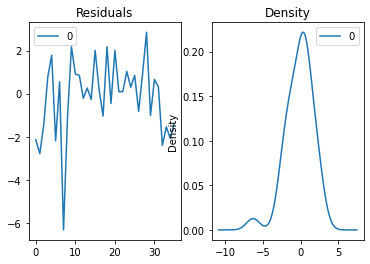

In [20]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

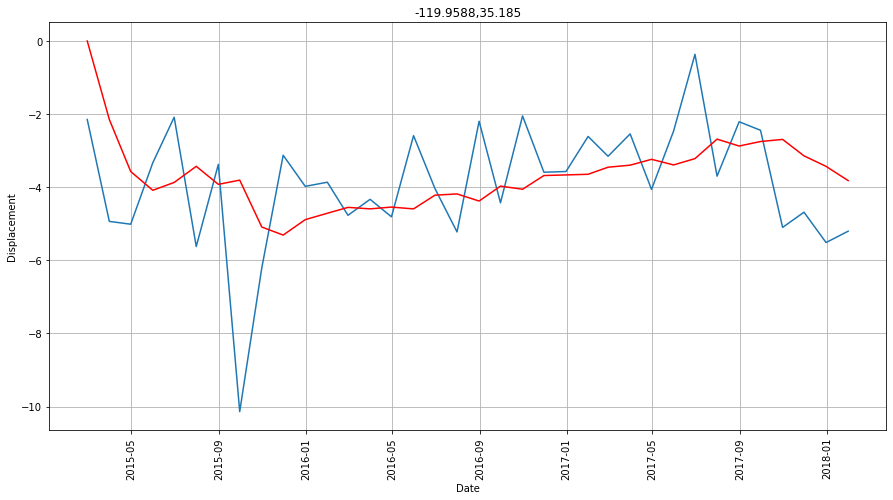

In [29]:
results = model.fit()

plt.figure(figsize=[15, 7.5]); # Set dimensions for figure

plt.title('-119.9588,35.185')
plt.ylabel('Displacement')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.grid(True)



plt.plot(df_train.date.values,df_train.data.values )
plt.plot(df_train.date.values, results.fittedvalues, color='red')
plt.show()

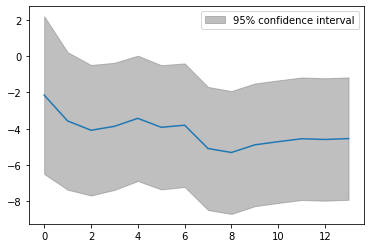

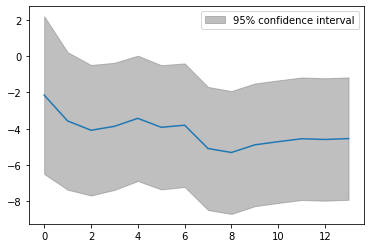

In [34]:

plot_predict(results,1,14)

next step is to run arimax, and create a better visualization for this prediction.